# Problem Statement


## Vehicle Dataset


#### The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
#### Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
#### van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
#### The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

In [552]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

## 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [553]:
# Read the data from file and display random 5 records to get the glimpse of the data.
Vehicle_df = pd.read_csv("vehicle.csv")
Vehicle_df.sample(5)

compactness  circularity  distance_circularity  radius_ratio  \
130          100         46.0                 104.0         184.0   
289           88         37.0                  57.0         132.0   
792          100         51.0                 104.0         163.0   
171          106         54.0                 103.0         161.0   
14            94         49.0                  79.0         203.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
130                  60.0                        9          197.0   
289                  62.0                        6          135.0   
792                  52.0                       10          206.0   
171                  47.0                        4          247.0   
14                   71.0                        5          174.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
130           34.0                    23.0                        147   
289           50.0                    18.0                        125   
792           32.0                    23.0                        164   
171           27.0                    27.0                        166   
14            37.0                    21.0                        154   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
130            222.0              578.0                      198.0   
289            151.0              265.0                      144.0   
792            217.0              631.0                      193.0   
171            266.0              892.0                      242.0   
14             196.0              465.0                      206.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
130                         73.0            13.0              13.0   
289                         83.0            16.0              16.0   
792                         69.0             5.0              21.0   
171                         85.0             4.0              11.0   
14                          71.0             6.0               2.0   

     skewness_about.2  hollows_ratio class  
130             189.0            197   car  
289             180.0            184   car  
792             188.0            196   car  
171             181.0            183   bus  
14              197.0            199   bus

In [554]:
# Get the rows and column count.
Vehicle_df.shape

(846, 19)

In [555]:
# Get the datatypes of each column.
Vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [556]:
# As class is categorical and being our target variable, lets get the size of data based on class.
Vehicle_df.groupby(['class']).size()

class
bus    218
car    429
van    199
dtype: int64

## Observations:

### The vehicle data havev 846 rows and 19 columns/features.
### All the features are numeric except class which is categorical. We have to convert it to numeric using Label Encoding.
### Grouping the data based on class, we have more data in car class than other two types (bus, van). This may lead to biased output towards car class.

In [557]:
# Lets check for duplicate values and delete.
Vehicle_df.duplicated().sum()

0

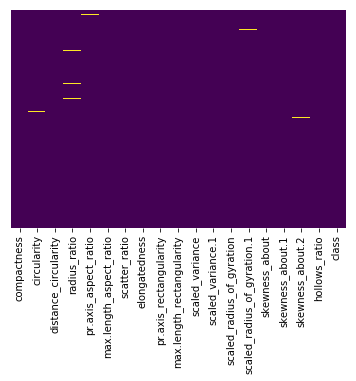

In [558]:
# Visualize the null/missing values using heatmap.
sns.heatmap(Vehicle_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [559]:
# Get the count of null values in each column.
print ("Count of null values in each feature:\n", Vehicle_df.isna().sum())

Count of null values in each feature:
 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA89D250B8>,
      dtype=object)

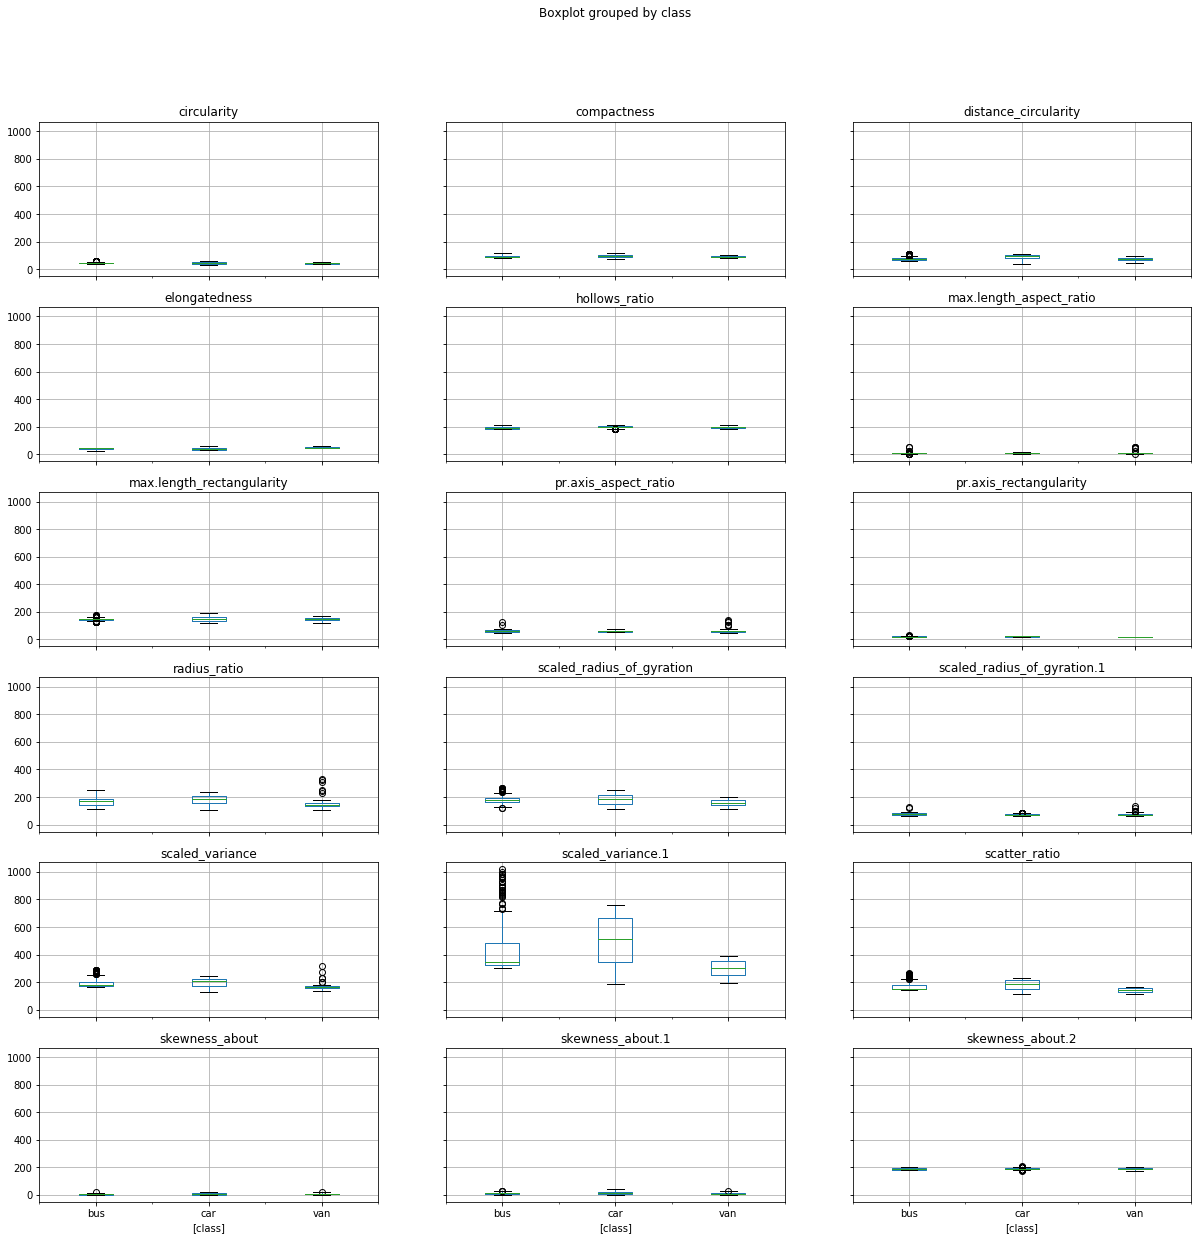

In [560]:
# Visualizing the outliers and skewness with boxplot grouped by class. As the class have influenze in the feature values.
Vehicle_df.boxplot(by = 'class',  layout=(6,3), figsize=(20, 20))

## Observations:

### There are no duplicate values in the dataset.
### We have some missing values in the data and outliers in the data.
### As we can see some skewness in the data, lets impute the missing values and outliers with median grouped by class as we can see clear distinction of values based on class.
### Lets split the train and test data before missing value/outlier treatment, to avoid the influence of test data in training data while we impute the missing values and outliers with median.

In [561]:
# Before splitting test and train, lets convert class feature from categorical datatype to numeric datatype 
# by using Label Encoding.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Vehicle_df['class'] = labelencoder.fit_transform(Vehicle_df['class'])

# Store the mapping in dict variable.
le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)

{'bus': 0, 'car': 1, 'van': 2}


In [562]:
# Get info to ensure the datatype of class feature.
Vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [563]:
# Get the data size based on class to ensure the correctness of mapping.
Vehicle_df.groupby(['class']).size()

class
0    218
1    429
2    199
dtype: int64

In [564]:
# Now lets split the data to test and train before imputing the median grouped by class for missingvalues/outliers 
# to avoid the influenze of test data in training data.
from sklearn import model_selection

X = Vehicle_df.iloc[:,:-1]
y = Vehicle_df['class']

test_size = 0.30 # taking 70:30 training and test set
seed = 10  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [565]:
# Lets merge X_train and y_train to do missing value imputation with median grouped by class.
y_train_df = pd.Series(y_train, name='class')
Xy_train = pd.concat([X_train, y_train_df], axis=1)

# Lets merge X_test and y_test to do missing value imputation with median grouped by class.
y_test_df = pd.Series(y_test, name='class')
Xy_test = pd.concat([X_test, y_test_df], axis=1)

In [566]:
# Missing value imputation with median grouped by class.
def groupMeanValue(group):
    group = group.fillna(group.median())
    return group

Xy_train = Xy_train.groupby("class").transform(groupMeanValue)
Xy_train.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [567]:
Xy_test = Xy_test.groupby("class").transform(groupMeanValue)
Xy_test.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [568]:
X_train = Xy_train.copy(deep=True)
X_test = Xy_test.copy(deep=True)

In [569]:
# Standardizing and Imputing outliers with Median.
from scipy.stats import zscore

# Standardizing with zscore
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

# Standardize feature space to have mean 0 and variance 1
#X_train = (X_train-np.mean(X_train,axis = 0))/np.std(X_train,axis = 0)
#X_test = (X_test-np.mean(X_test,axis = 0))/np.std(X_test,axis = 0)

In [570]:
# Addressing outliers at group level

def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()
    return group

# Lets merge X_train and y_train to do outlier imputation with median grouped by class.
Xy_train = pd.concat([X_train, y_train_df], axis=1)

# Lets merge X_test and y_test to do outlier imputation with median grouped by class.
Xy_test = pd.concat([X_test, y_test_df], axis=1)

X_train = (Xy_train.groupby('class').transform(replace)) 
X_test = (Xy_test.groupby('class').transform(replace))

C:\Users\Iyyappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA59671320>,
      dtype=object)

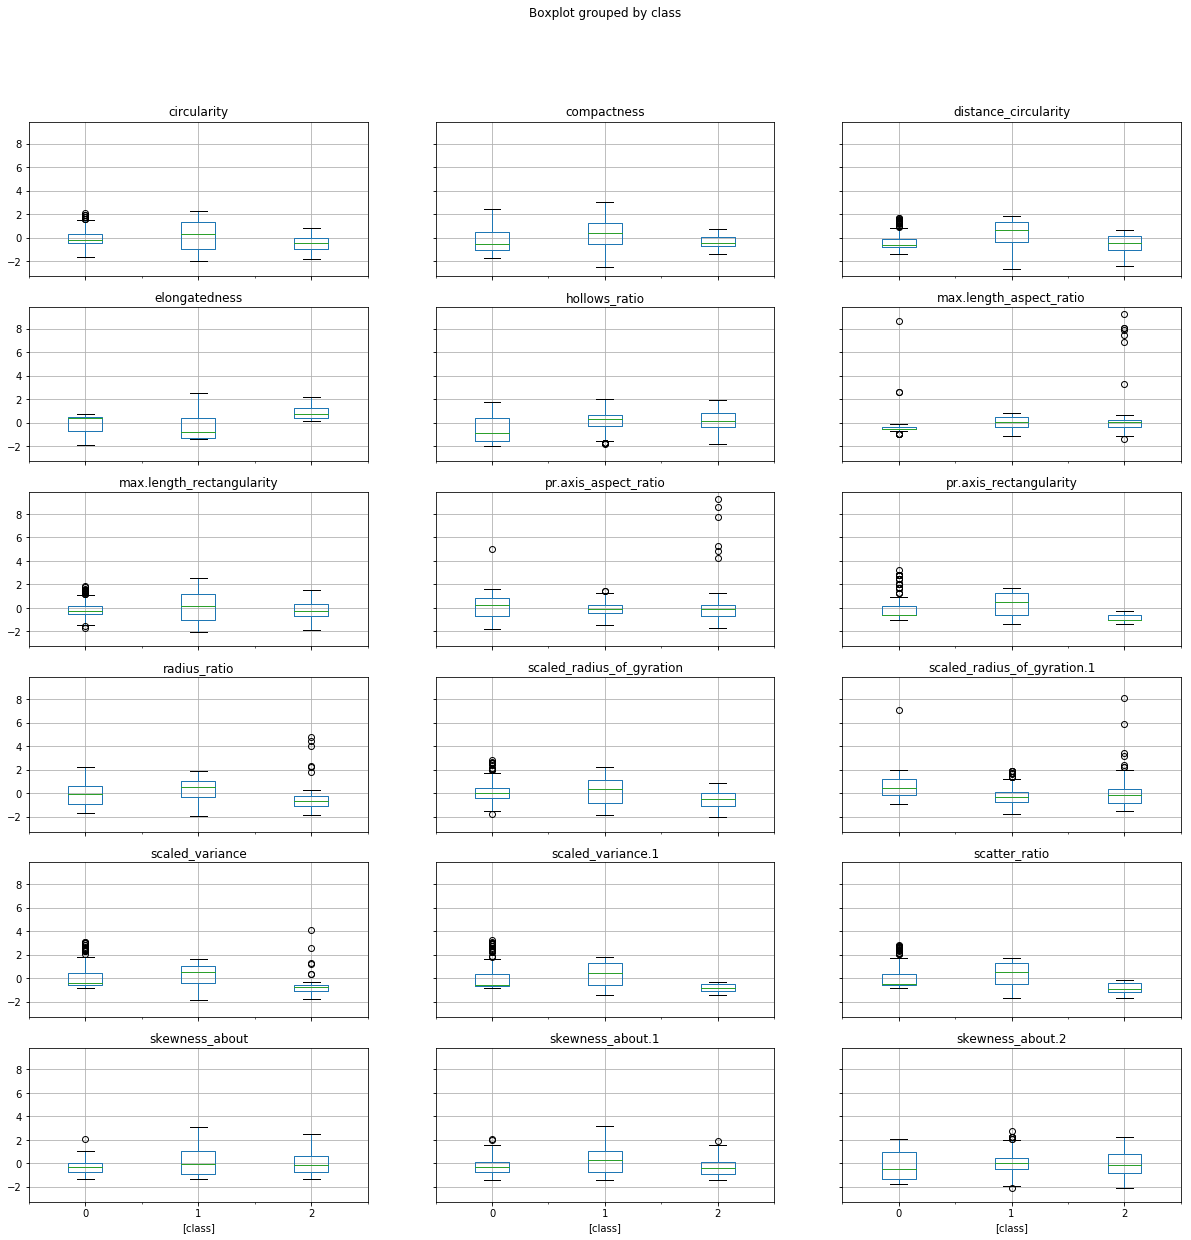

In [571]:
# Box plot before oulier removal grouped by class
Xy_train.boxplot(by = 'class',  layout=(6,3), figsize=(20, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA959D7668>,
      dtype=object)

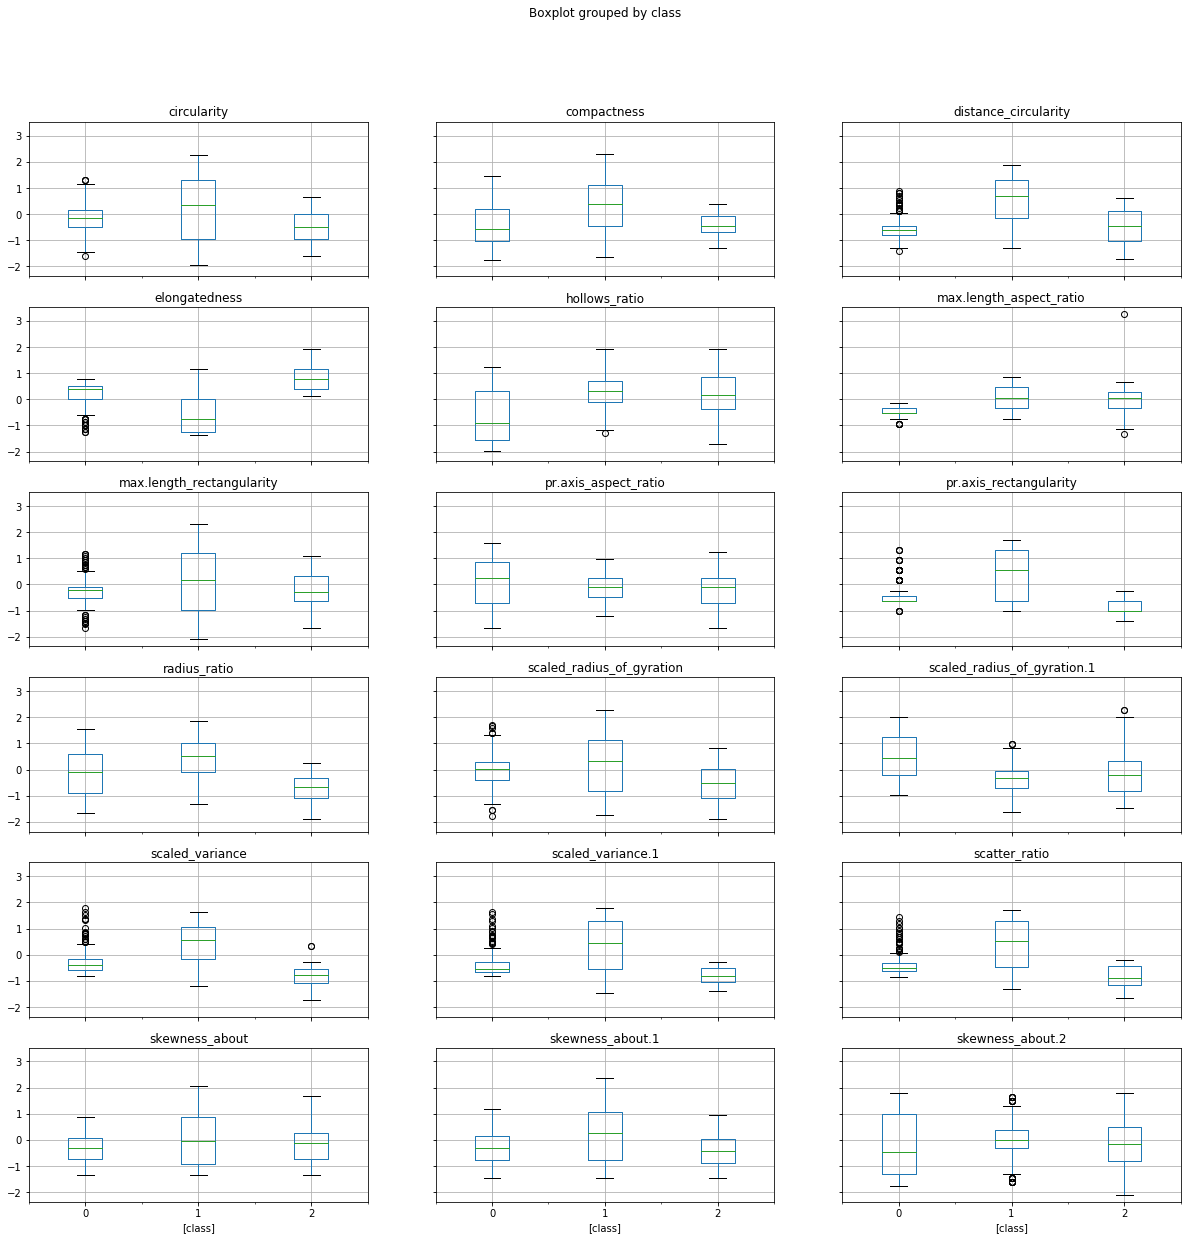

In [572]:
# Box plot after oulier removal grouped by class
Xy_train = pd.concat([X_train, y_train_df], axis=1)
Xy_test = pd.concat([X_test, y_test_df], axis=1)

Xy_train.boxplot(by = 'class',  layout=(6,3), figsize=(20, 20))

## Observations:

### First we have splited train and test date. (not to have influence of test data in training data while imputation).
### Then imputed missing values in median grouped by class.
### Then standardized the values with zscore.
### Then imputed the outliers with median grouped by class.

### Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them.





## 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

C:\Users\Iyyappan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Iyyappan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


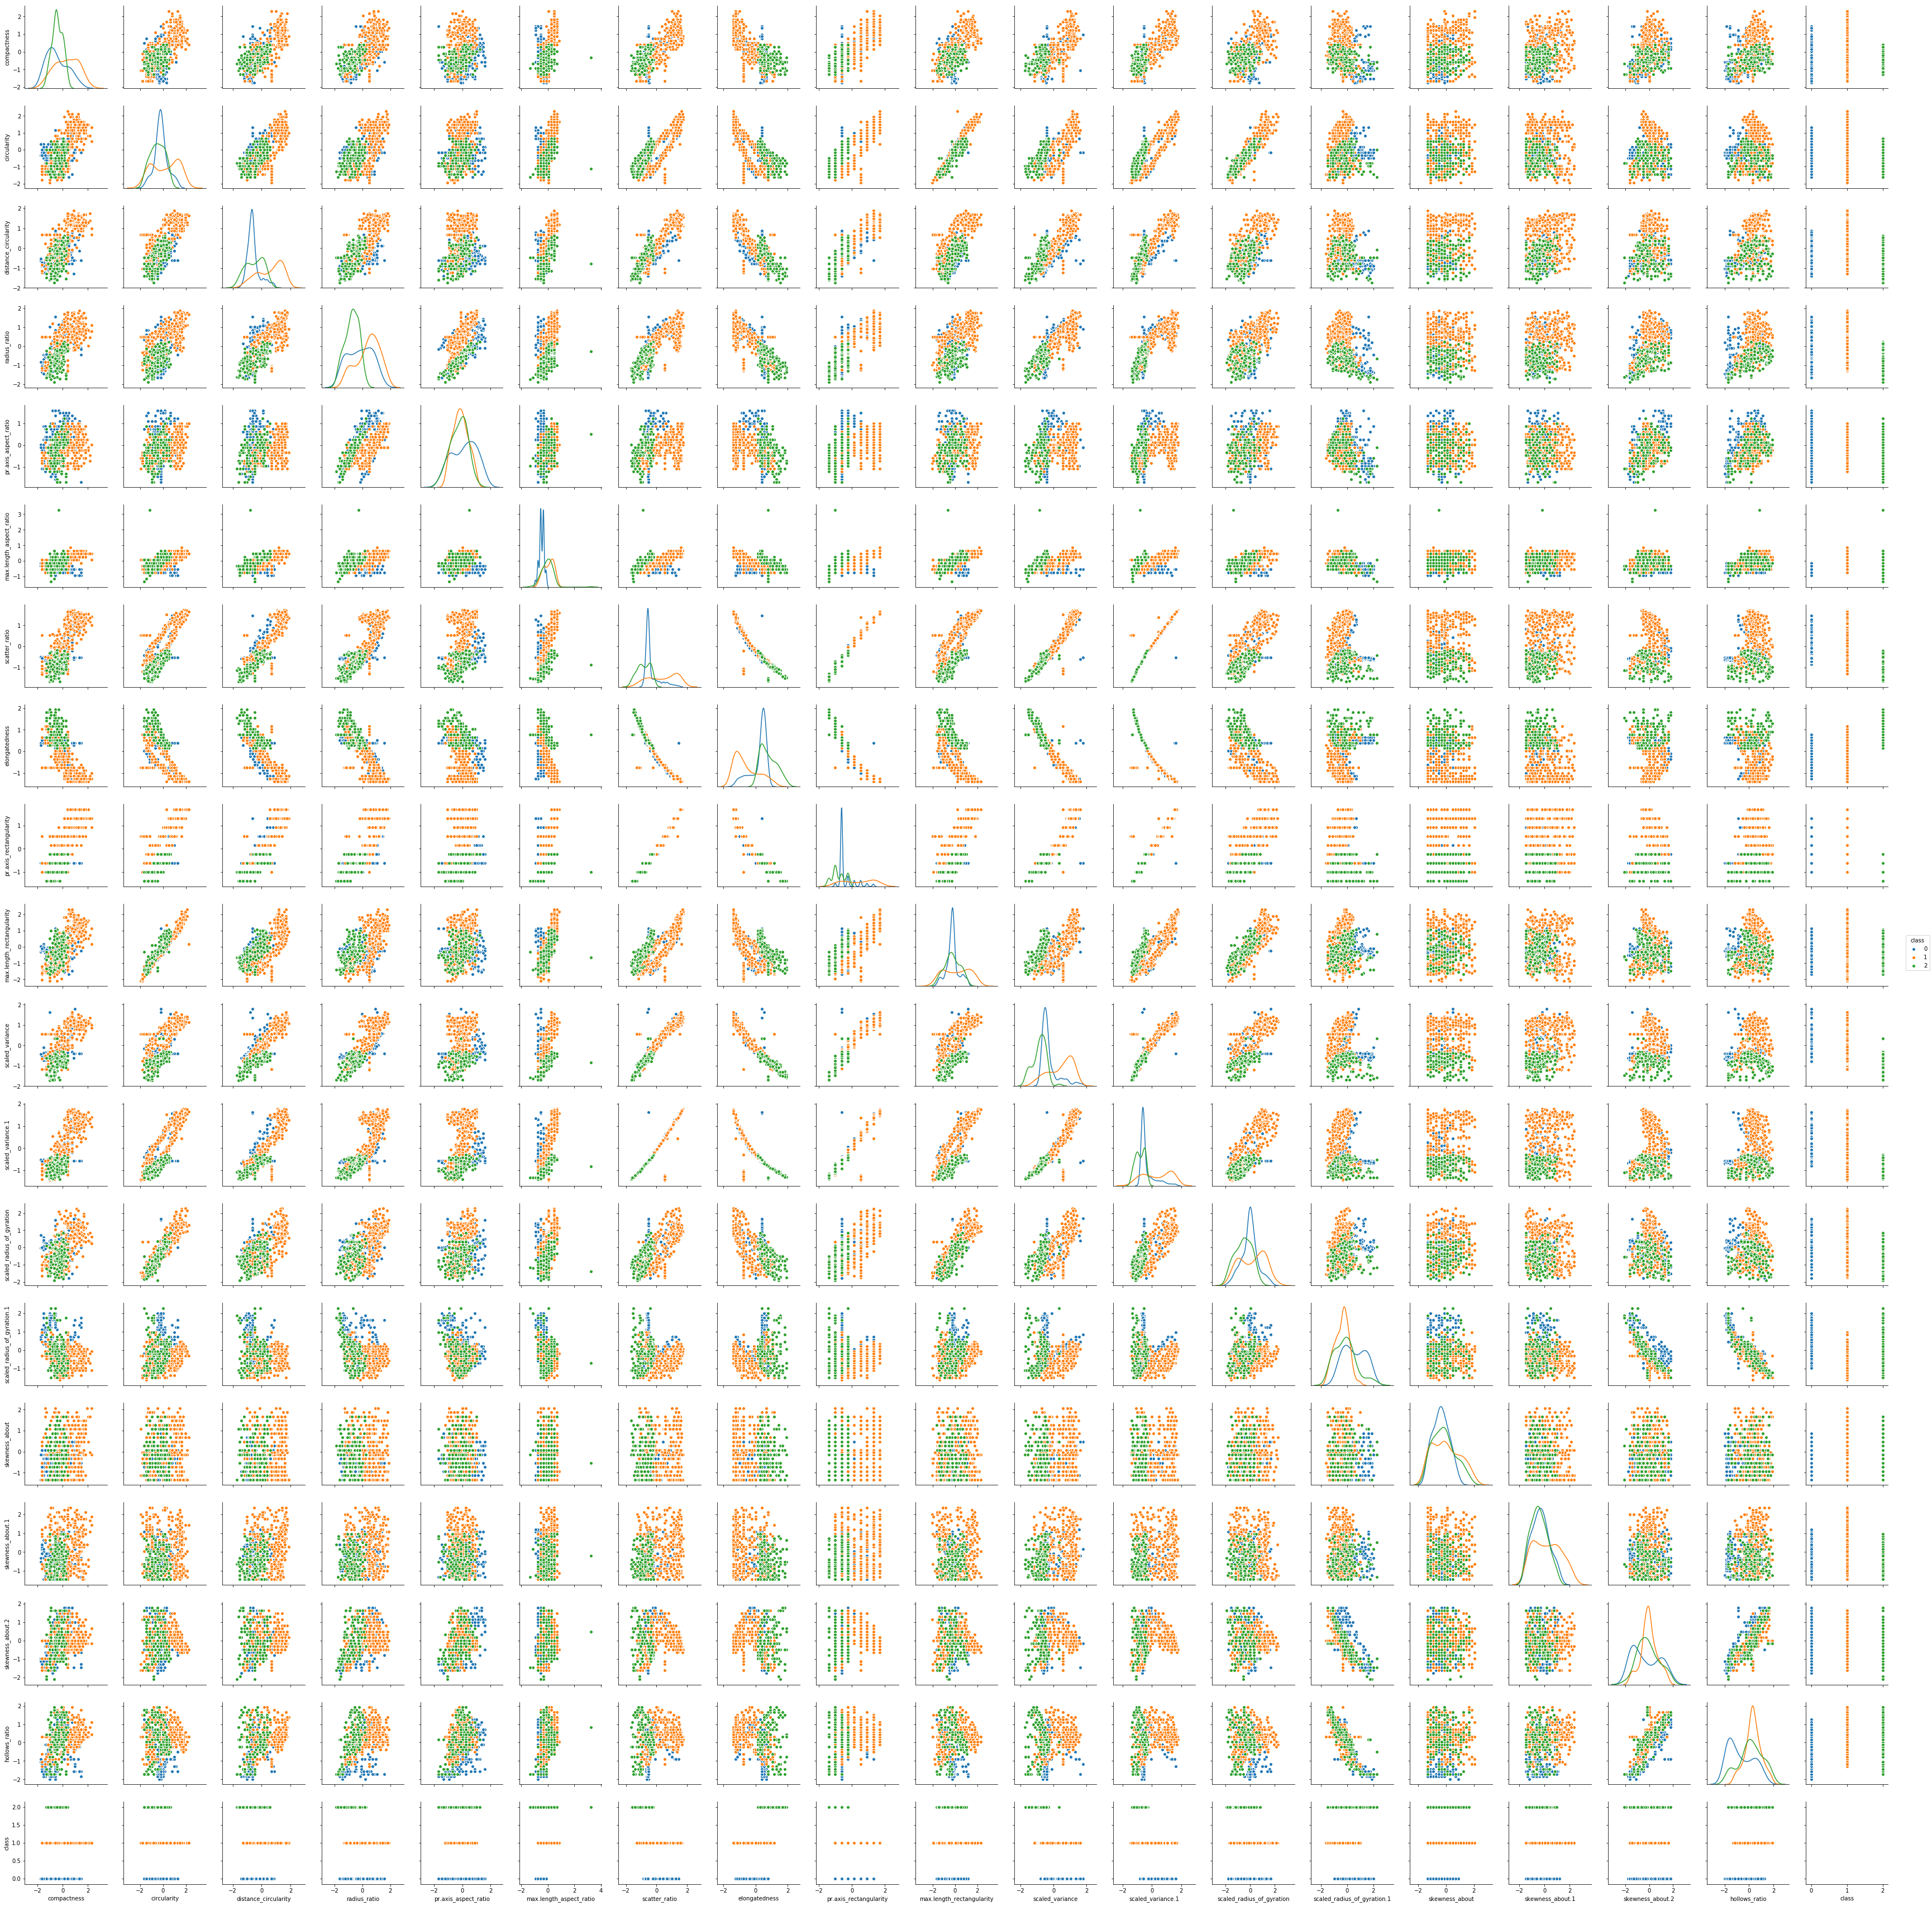

In [573]:
sns.pairplot(Xy_train, diag_kind='kde', hue='class')

## Observations:

### From the diagonal Kde it is evident that, there are mixed gaussians.
### Relationship between variables shows some correlation. Some are linear and some are not.
### There are highly correlated independent variables.
### There are some skewness in the data due to outliers.
### Lets list the relationship between features using correlation matrix and eliminate the featuers having very less correlation with class.

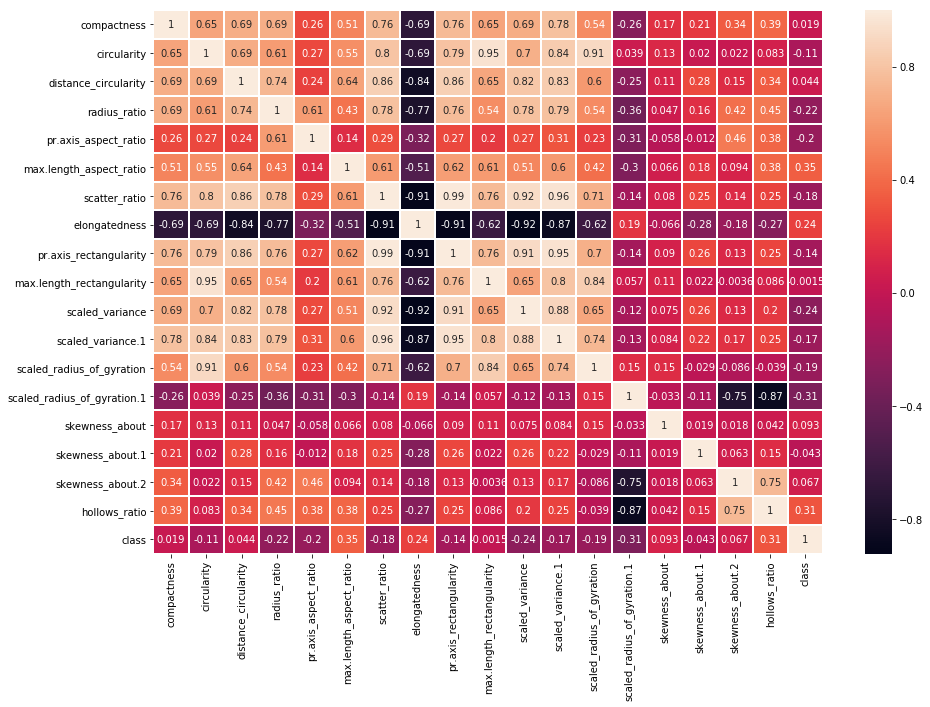

In [574]:
plt.subplots(figsize=(15,10))
sns.heatmap(Xy_train.corr(), annot=True, linewidths=1)

In [575]:
CorrMat = Xy_train.corr()
indices = np.where((CorrMat < 0.1) & (CorrMat > -0.1))
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
if len(indices) == 0:
    print ("All the attributes have some corrrelation between them.")
else:
    print ("There is no significant correlation between the following attributes: ")
    print ("------------------------------------------------------------------------")
    print(indices)
    print("====================================================================")
    indices = np.where((CorrMat < 0.1) & (CorrMat > -0.1))
    indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == 18]
    if len(indices) == 0:
        print ('All the attributes have some corrrelation with class.')
    else:
        print ("There is no significant correlation between class and the following attributes: ", indices)

There is no significant correlation between the following attributes: 
------------------------------------------------------------------------
[('compactness', 'class'), ('circularity', 'scaled_radius_of_gyration.1'), ('circularity', 'skewness_about.1'), ('circularity', 'skewness_about.2'), ('circularity', 'hollows_ratio'), ('distance_circularity', 'class'), ('radius_ratio', 'skewness_about'), ('pr.axis_aspect_ratio', 'skewness_about'), ('pr.axis_aspect_ratio', 'skewness_about.1'), ('max.length_aspect_ratio', 'skewness_about'), ('max.length_aspect_ratio', 'skewness_about.2'), ('scatter_ratio', 'skewness_about'), ('elongatedness', 'skewness_about'), ('pr.axis_rectangularity', 'skewness_about'), ('max.length_rectangularity', 'scaled_radius_of_gyration.1'), ('max.length_rectangularity', 'skewness_about.1'), ('max.length_rectangularity', 'skewness_about.2'), ('max.length_rectangularity', 'hollows_ratio'), ('max.length_rectangularity', 'class'), ('scaled_variance', 'skewness_about'), ('sca

In [576]:
indices = np.where(CorrMat > 0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
print ("There is significant positive correlation between the following attributes: ")
print ("------------------------------------------------------------------------")
print(indices)
print("====================================================================")
indices = np.where(CorrMat > 0.1)
indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == 18]
print ("There is significant positive correlation between class and the following attributes: ", indices)

There is significant positive correlation between the following attributes: 
------------------------------------------------------------------------
[('compactness', 'circularity'), ('compactness', 'distance_circularity'), ('compactness', 'radius_ratio'), ('compactness', 'pr.axis_aspect_ratio'), ('compactness', 'max.length_aspect_ratio'), ('compactness', 'scatter_ratio'), ('compactness', 'pr.axis_rectangularity'), ('compactness', 'max.length_rectangularity'), ('compactness', 'scaled_variance'), ('compactness', 'scaled_variance.1'), ('compactness', 'scaled_radius_of_gyration'), ('compactness', 'skewness_about'), ('compactness', 'skewness_about.1'), ('compactness', 'skewness_about.2'), ('compactness', 'hollows_ratio'), ('circularity', 'distance_circularity'), ('circularity', 'radius_ratio'), ('circularity', 'pr.axis_aspect_ratio'), ('circularity', 'max.length_aspect_ratio'), ('circularity', 'scatter_ratio'), ('circularity', 'pr.axis_rectangularity'), ('circularity', 'max.length_rectangu

In [577]:
indices = np.where(CorrMat < -0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
print ("There is significant negative correlation between the following attributes: ")
print ("------------------------------------------------------------------------")
print(indices)
print("====================================================================")
indices = np.where(CorrMat < -0.1)
indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == 18]

if len(indices) == 0:
    print ("class do not have negative correlation with any attributes.")
else:
    print ("There is significant negative correlation between class and the following attributes: ", indices)

There is significant negative correlation between the following attributes: 
------------------------------------------------------------------------
[('compactness', 'elongatedness'), ('compactness', 'scaled_radius_of_gyration.1'), ('circularity', 'elongatedness'), ('circularity', 'class'), ('distance_circularity', 'elongatedness'), ('distance_circularity', 'scaled_radius_of_gyration.1'), ('radius_ratio', 'elongatedness'), ('radius_ratio', 'scaled_radius_of_gyration.1'), ('radius_ratio', 'class'), ('pr.axis_aspect_ratio', 'elongatedness'), ('pr.axis_aspect_ratio', 'scaled_radius_of_gyration.1'), ('pr.axis_aspect_ratio', 'class'), ('max.length_aspect_ratio', 'elongatedness'), ('max.length_aspect_ratio', 'scaled_radius_of_gyration.1'), ('scatter_ratio', 'elongatedness'), ('scatter_ratio', 'scaled_radius_of_gyration.1'), ('scatter_ratio', 'class'), ('elongatedness', 'pr.axis_rectangularity'), ('elongatedness', 'max.length_rectangularity'), ('elongatedness', 'scaled_variance'), ('elongate

## Observations:
### Have listed the correlation between attributes in the above outputs.
### There are highly correlated independent variables. PCA might work.
### Class do not have significant correlation with the below features...
### 'compactness', 'distance_circularity', 'pr.axis_aspect_ratio', 'max.length_rectangularity', 'skewness_about.1', 'skewness_about.2'
### So lets eliminate the above attributes (6) and consider only the rest (12) for analysis.

In [578]:
# Eliminating the attributes (6) which has no signification correlation with class.
cols = [ 'compactness', 'distance_circularity', 'pr.axis_aspect_ratio', 'max.length_rectangularity', 'skewness_about.1', 'skewness_about.2']
X_train.drop(cols, axis=1, inplace=True)
X_test.drop(cols, axis=1, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 285 to 265
Data columns (total 12 columns):
circularity                    592 non-null float64
radius_ratio                   592 non-null float64
max.length_aspect_ratio        592 non-null float64
scatter_ratio                  592 non-null float64
elongatedness                  592 non-null float64
pr.axis_rectangularity         592 non-null float64
scaled_variance                592 non-null float64
scaled_variance.1              592 non-null float64
scaled_radius_of_gyration      592 non-null float64
scaled_radius_of_gyration.1    592 non-null float64
skewness_about                 592 non-null float64
hollows_ratio                  592 non-null float64
dtypes: float64(12)
memory usage: 80.1 KB


## 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [579]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
Explained_Variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_
print("Explianed Variance Ratio:\n", Explained_Variance)
print("\nSingular Values:\n", singular_values)

Explianed Variance Ratio:
 [0.61571761 0.17337386 0.0855321  0.05035942 0.02607447 0.01397354
 0.00981188 0.00855321 0.00683629 0.00522026 0.0037448  0.00080255]

Singular Values:
 [56.56812678 30.01738281 21.08363934 16.17787117 11.64095797  8.52185526
  7.14097037  6.66723074  5.96061938  5.20867362  4.4115946   2.04228612]


In [580]:
tot = sum(Explained_Variance)
var_exp = [( i /tot ) * 100 for i in sorted(Explained_Variance, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 61.57176126  78.90914769  87.46235776  92.49829985  95.10574646
  96.50309996  97.48428845  98.33960909  99.02323854  99.5452647
  99.91974517 100.        ]


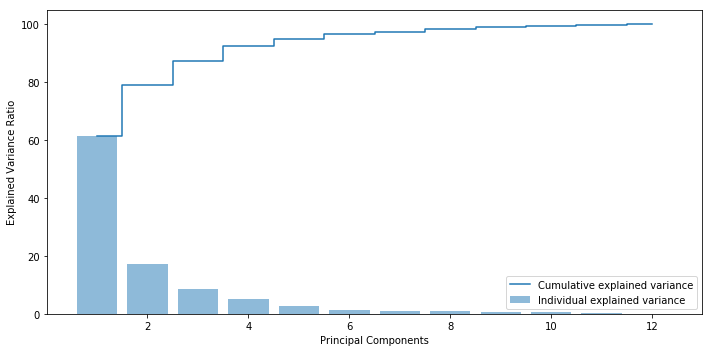

In [581]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, Explained_Variance.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, Explained_Variance.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

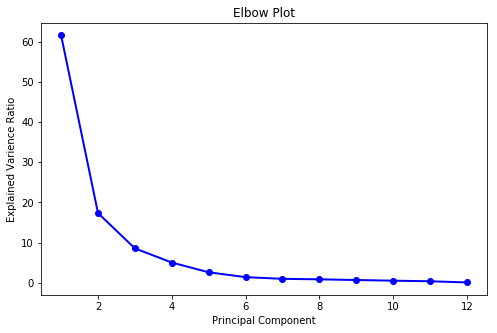

In [582]:
fig = plt.figure(figsize=(8,5))
plt.plot(range(1, Explained_Variance.size + 1), var_exp, 'bo-', linewidth=2)
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Varience Ratio')
plt.show()

## Observations:

### There are unequal eigen values. PCA might work.
### Based on the above explained varience... lets reduce the dimension to 8 (which covers the 98% of varience). The PC 9, 10, 11 and 12 have very less varience explained. Lets discard these the PC's from 9 to 12 and consider only the first 8 PC's.

In [583]:
# Create a PCA that will retain 98% of the variance
pca = PCA(n_components=.98)
pca.fit(X_train)

# Conduct PCA
X_train_pca = pca.transform(X_train)

In [584]:
print('Original number of features:', X_train.shape[1])
print('Reduced number of features:', X_train_pca.shape[1])

Original number of features: 12
Reduced number of features: 8


In [585]:
# Lets tranform the X_test also...
X_test_pca = pca.transform(X_test)

In [586]:
print('Original number of features:', X_test.shape[1])
print('Reduced number of features:', X_test_pca.shape[1])

Original number of features: 12
Reduced number of features: 8


C:\Users\Iyyappan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Iyyappan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


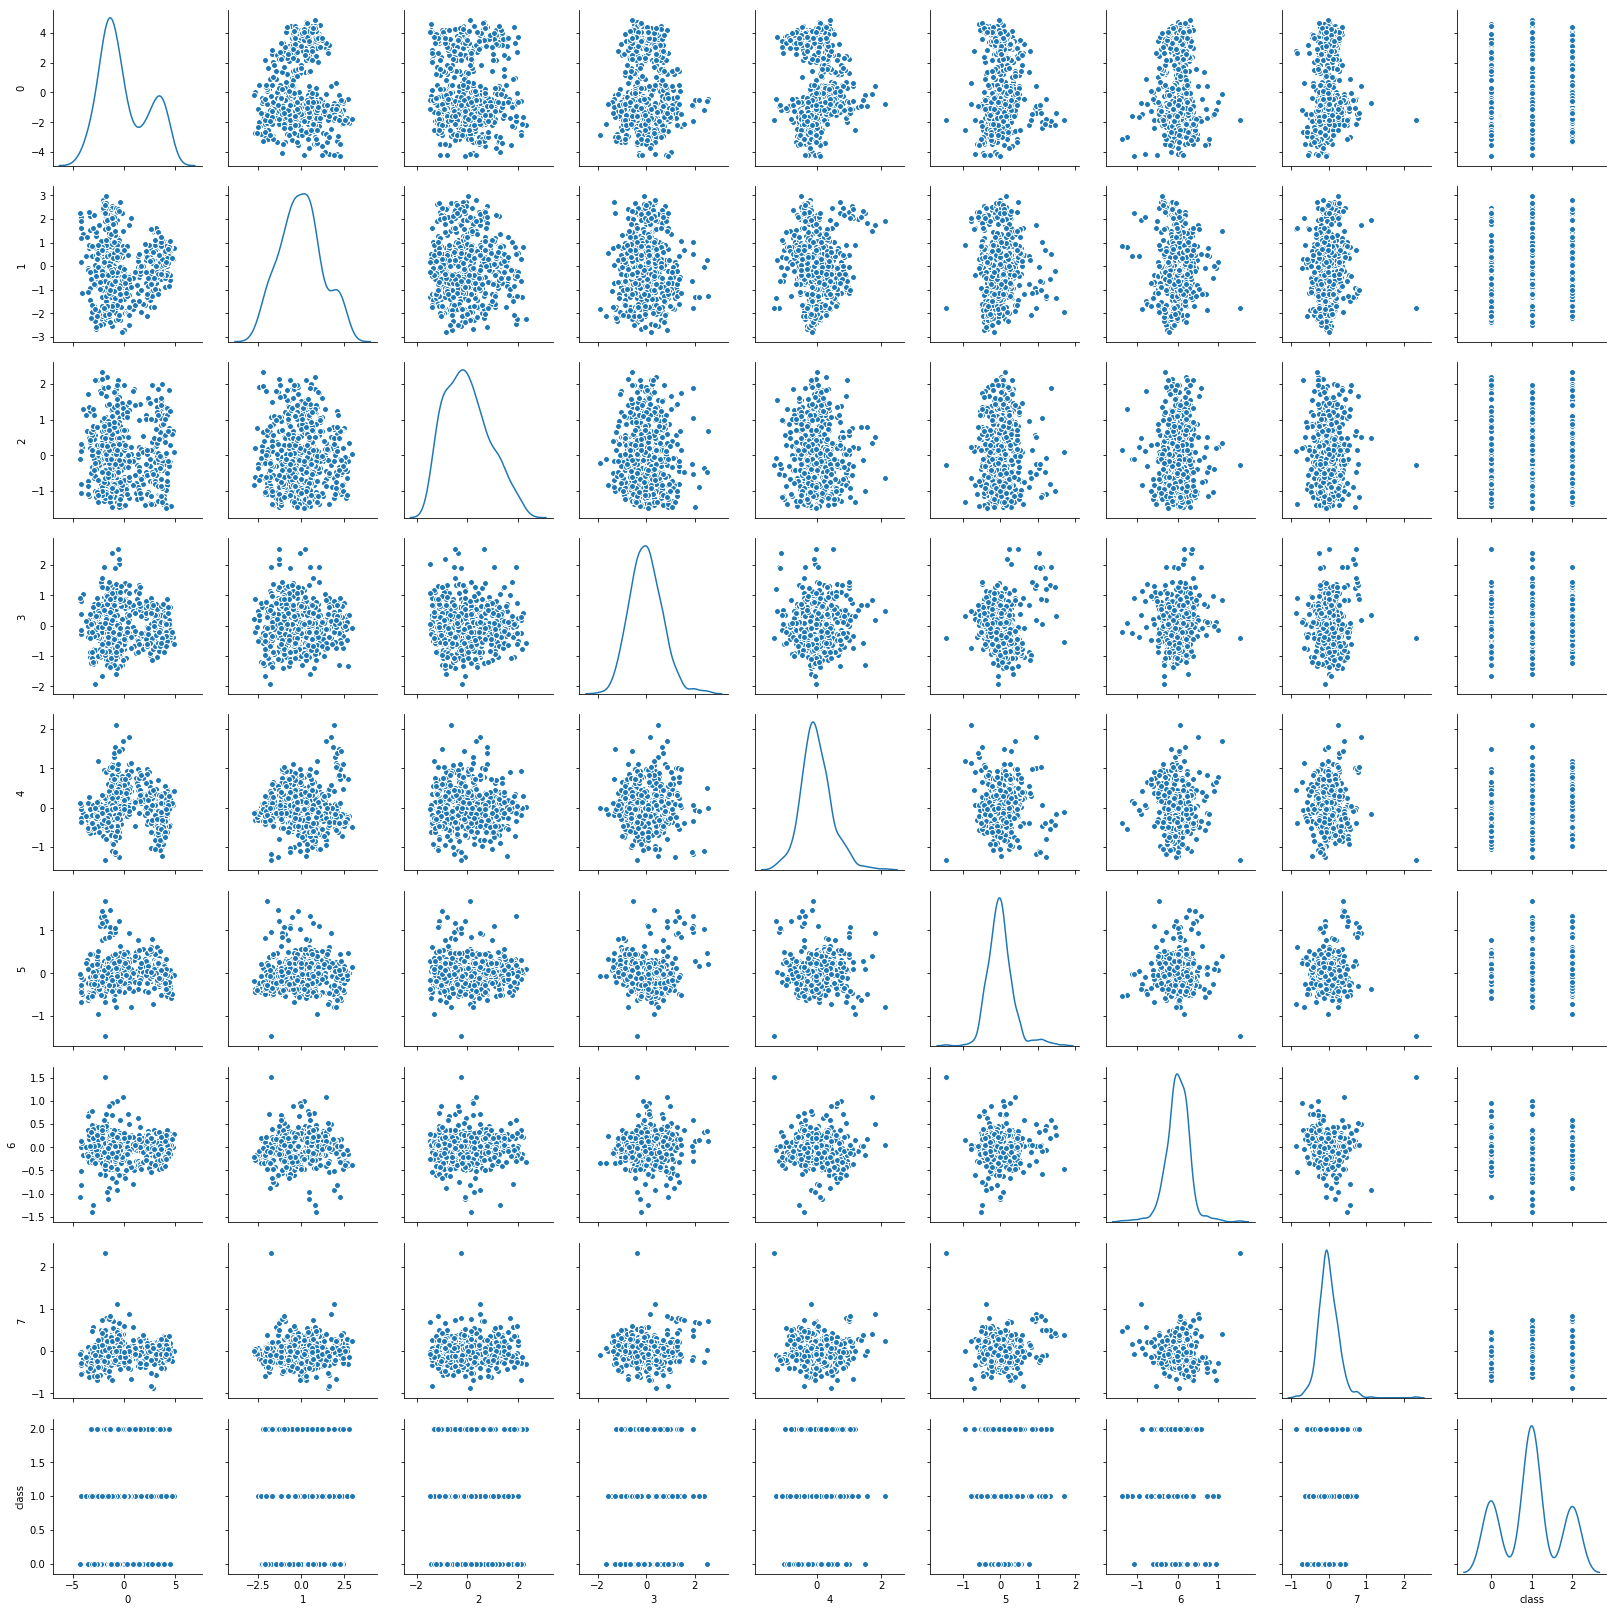

In [587]:
Proj_data_Train = pd.DataFrame(X_train_pca)  # converting array to dataframe for pairplot
Proj_data_Train = Proj_data_Train.join(y_train)
sns.pairplot(Proj_data_Train, diag_kind='kde')

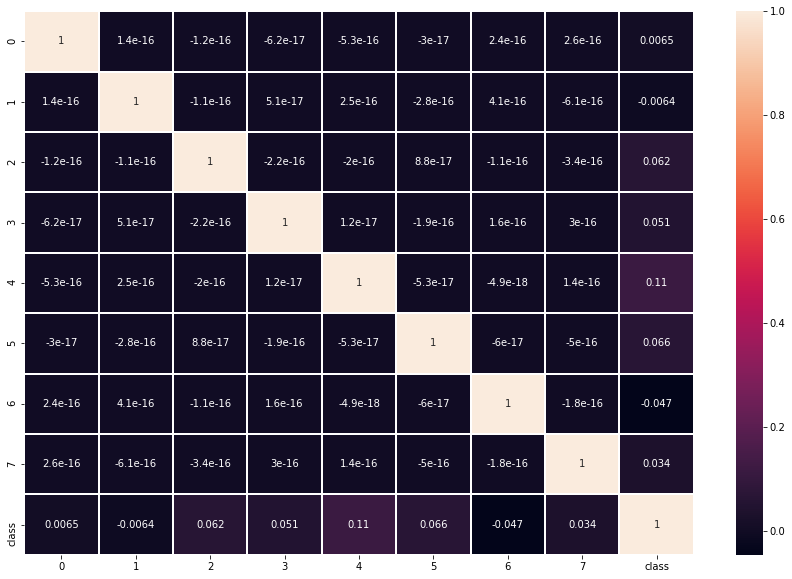

In [588]:
# Check for correlation of variable
plt.subplots(figsize=(15,10))
sns.heatmap(Proj_data_Train.corr(), annot=True, linewidths=1)

## Observations:
### All the correlations are eleminated between the independent variables.
### Any of the PC is uncorrelated with all others.
### There is no significant correlation between target (Class) and any of the PCA.
### What was clearly visible as separate gaussians in original dimension is not visible any more. This is due to the fact that PCA dimesions are composite of the original dimensions

## 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [589]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_pca, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_pca, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.91


In [590]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV
param_grid = [{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]}]

In [591]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [592]:
gs.fit(X_train_pca, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=12,
       param_grid=[{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [593]:
gs.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [594]:
gs.best_score_ 

0.9290540540540541

## Observation:

### Through grid search we have got C=1 and kernel =rbf as the best fit. 
### Lets apply the hyper parameter to SVM and get the accuracy.

In [595]:
svc = SVC(C=1, kernel='rbf')
svc.fit(X_train_pca, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_pca, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.91


In [596]:
from sklearn.model_selection import cross_val_score

scoresTrain = cross_val_score(svc, X_train_pca, y_train, cv=10)
print("Train Accuracy Mean: %0.2f" % (scoresTrain.mean()))
print("\nTrain Scores:\n", scoresTrain)

Train Accuracy Mean: 0.93

Train Scores:
 [0.93442623 0.91666667 0.98333333 0.9        0.96610169 0.94915254
 0.91525424 0.94827586 0.82758621 0.94827586]


In [597]:
scoresTest = cross_val_score(svc, X_test_pca, y_test, cv=10)
print("Test Accuracy Mean: %0.2f" % (scoresTest.mean()))
print("\nTest Scores:\n", scoresTest)

Test Accuracy Mean: 0.88

Test Scores:
 [0.96296296 0.84615385 0.92307692 0.76923077 0.80769231 0.88
 0.96       0.92       0.95833333 0.79166667]
